In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

In [5]:
#load data
df_audit=pd.read_csv('/content/audit_risk.csv')
df_audit.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [6]:
df_audit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [7]:
df_audit.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [8]:
# Seperating Train and Test data
df_train,df_test=train_test_split(df_audit,test_size=0.20,random_state=40,stratify=df_audit['Risk'])

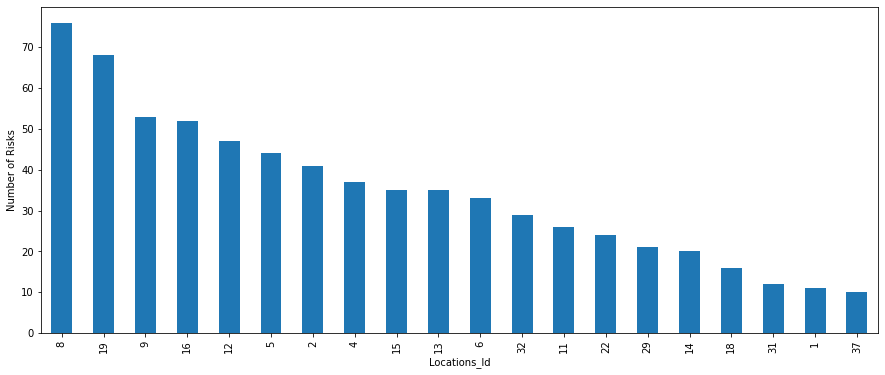

In [9]:
df_audit["LOCATION_ID"].value_counts()[:20].plot(
    kind="bar", figsize=(15, 6), xlabel="Locations_Id", ylabel="Number of Risks"
)

# Feature Selection

In [10]:
def get_correlated_features_df(dataframe:pd.DataFrame,target:str):
  """This function finds the best correlated features with the target variable.

  Args:
  dataframe (pd.Dataframe) : raw cleaned dataframe on which correlation has to be made.
  target (str): Target Column name on which most correlated features are selected.

  Return:
  pd.DataFrame: A dataframe with correlated features with the target variable. 
  """
  df_corr=dataframe.corr()
  columns_set_1=df_corr[df_corr[target]>0.4].index.tolist()
  df_1=dataframe[columns_set_1]
  print("Highly Correlated Features: \n",df_1.columns)
  return df_1

In [11]:
def remove_multi_collinearity(dataframe,target):
  """This function remove the multi collinear columns from the dataframe.

  Args:
  dataframe (pd.Dataframe) : raw cleaned dataframe on which multi collinearity has to be removed.
  target (str): Target Column 

  Return:
  pd.DataFrame: A dataframe without multi collinear features. 
  """
  df_corr=dataframe.drop(target,axis=1).corr().abs()
  upper_tri = df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype(bool))
  to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
  print("\nColumns to be dropped: \n",to_drop)
  df_final=dataframe.drop(to_drop,axis=1)
  print("\nColumns in the dataframe after Feature Selection: \n", df_final.columns)
  return df_final,df_final.columns

In [12]:
df_train_1=get_correlated_features_df(df_train,'Risk')
df_train_final,final_columns=remove_multi_collinearity(df_train_1,'Risk')

Highly Correlated Features: 
 Index(['Score_A', 'Risk_A', 'Score_B', 'Score_MV', 'District_Loss', 'RiSk_E',
       'Score', 'CONTROL_RISK', 'Risk'],
      dtype='object')

Columns to be dropped: 
 ['RiSk_E']

Columns in the dataframe after Feature Selection: 
 Index(['Score_A', 'Risk_A', 'Score_B', 'Score_MV', 'District_Loss', 'Score',
       'CONTROL_RISK', 'Risk'],
      dtype='object')


# Analytics

[]

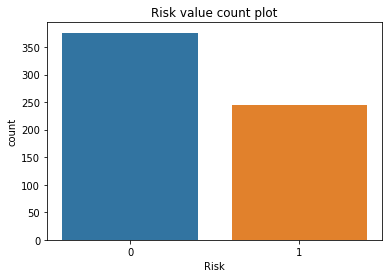

In [13]:
#y_variable count plot
sns.countplot(data=df_train_final,x='Risk')
plt.title("Risk value count plot")
plt.savefig('y_variable_count_plot.png')
plt.plot()

[]

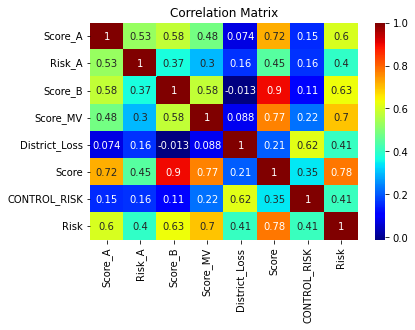

In [14]:
#correlation matrix
sns.heatmap(df_train_final.corr(),annot=True,cmap="jet")
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.plot()

# Modelling

In [15]:
def stratified_results(x:np.array,y:np.array):
  """This function performs Stratified K fold using RandomForestClassifier.
  Args:
  x(np.array): Independent variables.
  y(np.array): Dependent variable

  Print:
  Max,min,mean and std on calculated accuracies
  """
  skf = StratifiedKFold(n_splits=5)
  accuracy_lst = []
  rf=RandomForestClassifier()
  for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    rf.fit(x_train_fold, y_train_fold)
    accuracy_lst.append(rf.score(x_test_fold, y_test_fold))
  print("Maximum of Accuracies",max(accuracy_lst))
  print("Minimum of Accuracies",min(accuracy_lst))
  print("Mean of Accuracies: ", np.mean(accuracy_lst))
  print("Standard deviation of Accuracies", np.std(accuracy_lst))
  print()

def get_evaluation(y_test:pd.Series,test_predict:np.array,model_name:str,ev_type:str):
  """This model performs evaluations like accuracy,recall,precision,f1 score and confusion matrix
  Args:
  y_test(pd.Series): Actual target variable.
  test_predict(np.array): Predicted target variable.
  model_name(str): Name of the model by which confusion matrix plot has to saved.
  ev_type(str): Evaluation type(train or test)
  Print/plot:
  Print accuracy,recall,precision,f1 score, plot and save confusion matrix.
  """
  print("\nAccuracy:",accuracy_score(y_test,test_predict))
  print("Recall: ",recall_score(y_test,test_predict))
  print("Precision: ",precision_score(y_test,test_predict))
  print("F1_score: ",f1_score(y_test,test_predict))
  cf=classification_report(y_test,test_predict)
  
  print("\nClassification Report:")
  print("\n",cf)
  cm=confusion_matrix(y_test,test_predict)
  cm_plot=ConfusionMatrixDisplay(cm)
  cm_plot.plot()
  plt.title(model_name.__name__+" "+ev_type+" Confusion Matrix")
  plt.savefig(model_name.__name__+"_"+ev_type+"_confusion_matrix.png")
  plt.show()
  print()

def get_tuning_predictions(x_train:pd.DataFrame,y_train:pd.Series,x_test:pd.DataFrame,y_test:pd.Series,model_name:str,param_grid:dict):
  """This function do the find tuning and use get_evaluation function to do evaluation on the train and test prediction.
  Args:
  x_train(pd.Dataframe): Training independent variables data.
  y_train(pd.Series): Training dependent/target variable. 
  x_test(pd.Dataframe): Testing independent variables data
  y_train(pd.Series): Testing dependent/target variable.
  model_name(str): Name of the model.
  param_grid(dict): Dictionary of parameter on which parameter tuning has to be performed.

  Print:
  Print best parameters, evaluation on train and test predictions
  """
  gs_model=GridSearchCV(model_name(),param_grid=param_grid,scoring='accuracy',cv=10,verbose=1)
  gs_model.fit(x_train,y_train)
  
  res_model=model_name(**gs_model.best_params_)
  print(f'\nBest parameters for {model_name.__name__} after hyper parameter tuning\n',gs_model.best_params_)
  res_model.fit(x_train,y_train)
  print("\nEvaluation on Train Data")
  train_predict=res_model.predict(x_train)
  get_evaluation(y_train,train_predict,model_name,'train')
  test_predict=res_model.predict(x_test)
  print("\nEvaluation on Test Data ")
  get_evaluation(y_test,test_predict,model_name,'test')
  return

In [18]:
def on_screen():
  """Prints Menu on the screen
  """
  print("Choose from the below available models")
  print("1. Random Forest with StratifiedKFold")
  print("2. Random Forest")
  print("3. SVM")
  print("4. Logistic Regression")
  print("5. Exit Function")
def get_results(df_train:pd.DataFrame,df_test:pd.DataFrame,target:str):
  """This function is a menu driven function which performs desired training as mentioned in the menu.
  This function used above function to perform the chosen training,
  1. Random Forest with Stratified Kfold
  Grid Search- Hyperparameter Tuning:
  2. Random Forest
  3. SVM
  4. Logistic Regression
  5. Exit Function

  Args:
  df_train(pd.DataFrame): Training Data
  df_test(pd.DataFrame): Test Data
  target(str): Target Variable 

  """
  choice=1
  while(choice!=5):
    on_screen()
    choice=int(input("Enter your choice. Eg: 1,2,3: \n"))
    x_train=df_train.drop(target,axis=1)
    y_train=df_train[target]
    x_test=df_test.drop(target,axis=1)
    y_test=df_test[target]

    if(choice==1):
      print("StratifiedKFold Results:\n")
      stratified_results(pd.concat([x_train,x_test]).values,pd.concat([y_train,y_test]).values)
    
    elif(choice==2):
      param_grid_rf={'n_estimators': [25,50,75,100],
               'max_features': ['auto','sqrt'],
               'max_depth': [3,5,7,9],
                'bootstrap': [True, False]}
      print("\nRandomForest Results:\n")
      get_tuning_predictions(x_train,y_train,x_test,y_test,RandomForestClassifier,param_grid_rf)
    
    elif(choice==3):
      param_grid_svm = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [ 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly']}
      print("\nSVM Results:\n")
      get_tuning_predictions(x_train,y_train,x_test,y_test,SVC,param_grid_svm)
    
    elif(choice==4):
      param_grid_lr={'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                    'penalty':['elasticnet', 'l1', 'l2'], 
                     'C': [0.001,0.01,0.1,1]}
      print("\nLogistic Regression Results:\n")
      get_tuning_predictions(x_train,y_train,x_test,y_test,LogisticRegression,param_grid_lr)
  
  if(choice==5):
    return 

Choose from the below available models
1. Random Forest with StratifiedKFold
2. Random Forest
3. SVM
4. Logistic Regression
5. Exit Function
StratifiedKFold Results:

Maximum of Accuracies 0.9935897435897436
Minimum of Accuracies 0.967741935483871
Mean of Accuracies:  0.9729114971050455
Standard deviation of Accuracies 0.010339123242349047

Choose from the below available models
1. Random Forest with StratifiedKFold
2. Random Forest
3. SVM
4. Logistic Regression
5. Exit Function

RandomForest Results:

Fitting 10 folds for each of 64 candidates, totalling 640 fits

Best parameters for RandomForestClassifier after hyper parameter tuning
 {'bootstrap': False, 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 25}

Evaluation on Train Data

Accuracy: 0.9790322580645161
Recall:  0.9672131147540983
Precision:  0.979253112033195
F1_score:  0.9731958762886597

Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.98      

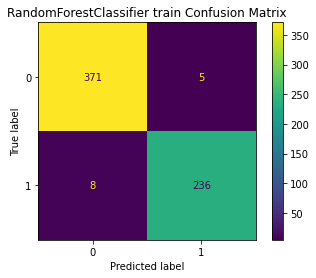



Evaluation on Test Data 

Accuracy: 0.9743589743589743
Recall:  0.9344262295081968
Precision:  1.0
F1_score:  0.9661016949152543

Classification Report:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98        95
           1       1.00      0.93      0.97        61

    accuracy                           0.97       156
   macro avg       0.98      0.97      0.97       156
weighted avg       0.98      0.97      0.97       156



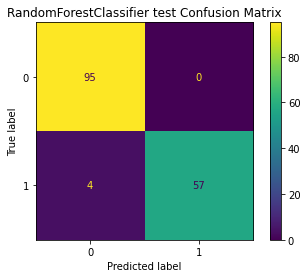


Choose from the below available models
1. Random Forest with StratifiedKFold
2. Random Forest
3. SVM
4. Logistic Regression
5. Exit Function

SVM Results:

Fitting 10 folds for each of 40 candidates, totalling 400 fits

Best parameters for SVC after hyper parameter tuning
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

Evaluation on Train Data

Accuracy: 0.9790322580645161
Recall:  0.9631147540983607
Precision:  0.9832635983263598
F1_score:  0.9730848861283643

Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.98       376
           1       0.98      0.96      0.97       244

    accuracy                           0.98       620
   macro avg       0.98      0.98      0.98       620
weighted avg       0.98      0.98      0.98       620



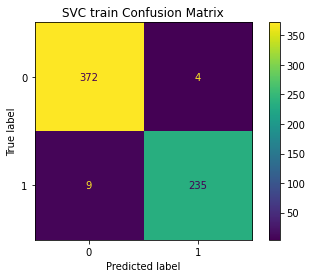



Evaluation on Test Data 

Accuracy: 0.9807692307692307
Recall:  0.9508196721311475
Precision:  1.0
F1_score:  0.9747899159663865

Classification Report:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       1.00      0.95      0.97        61

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



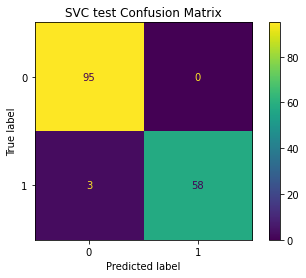


Choose from the below available models
1. Random Forest with StratifiedKFold
2. Random Forest
3. SVM
4. Logistic Regression
5. Exit Function

Logistic Regression Results:

Fitting 10 folds for each of 48 candidates, totalling 480 fits

Best parameters for LogisticRegression after hyper parameter tuning
 {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

Evaluation on Train Data

Accuracy: 0.95
Recall:  0.9098360655737705
Precision:  0.961038961038961
F1_score:  0.9347368421052632

Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.98      0.96       376
           1       0.96      0.91      0.93       244

    accuracy                           0.95       620
   macro avg       0.95      0.94      0.95       620
weighted avg       0.95      0.95      0.95       620



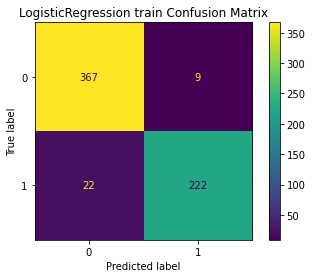



Evaluation on Test Data 

Accuracy: 0.9615384615384616
Recall:  0.9016393442622951
Precision:  1.0
F1_score:  0.9482758620689655

Classification Report:

               precision    recall  f1-score   support

           0       0.94      1.00      0.97        95
           1       1.00      0.90      0.95        61

    accuracy                           0.96       156
   macro avg       0.97      0.95      0.96       156
weighted avg       0.96      0.96      0.96       156



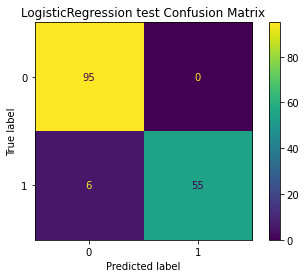


Choose from the below available models
1. Random Forest with StratifiedKFold
2. Random Forest
3. SVM
4. Logistic Regression
5. Exit Function
Enter your choice. Eg: 1,2,3: 
5


In [19]:
df_test_final=df_test[final_columns.tolist()]
get_results(df_train_final,df_test_final,'Risk')